# Healthiest Neighborhood in Pittsburgh

## Introduction

Health has always been an important if not the most important thing in a person’s life, but in the past decade, health has taken on a different meaning. People are starting to prioritize mental and emotional health just as much as physical. From the recent COVID-19 pandemic to the rise of mental health activism, the definition of health is evolving. In our report, we looked to explore and explain how these new meanings of health have affected neighborhoods in Pittsburgh.

# The Metrics

In our report we looked to find the healthiest neighborhood in Pittsburgh. This neighborhood had to be healthy mentally, physically, and emotionally. We broke this metric into three sub-metrics: best eating habits, must physically active, and less amount of Covid-19 cases. To measure these sub-metrics we used three datasets. One contains all the farmers markets in the Pittsburgh area, another holds all the recreational parks in Pittsburgh, and the last list the number of Covid-19 cases categorized by neighborhood. 

Here is our total data (again):

In [4]:
import pandas as pd

import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

covid_cases = pd.read_csv("covid_cases_by_neighborhood_municipality.csv", index_col="_id")

covid_cases.head(221)

,neighborhood_municipality,infections,reinfections,deaths,hospitalizations,pcr_tests,positive_pcr_tests,update_date
_id,,,,,,,,
92170,Aleppo,2188,169,19,28,2893,328,2023-05-15
92171,Allegheny Center (Pittsburgh),1703,195,5,19,3137,414,2023-05-15
92172,Allegheny West (Pittsburgh),524,76,0,5,1136,119,2023-05-15
92173,Allentown (Pittsburgh),3529,583,2,40,5171,679,2023-05-15
92174,Arlington (Pittsburgh),2607,397,9,36,4062,502,2023-05-15
...,...,...,...,...,...,...,...,...
92386,Whitehall,24844,2907,75,254,37120,4166,2023-05-15
92387,Wilkins,8411,936,16,107,13439,1665,2023-05-15
92388,Wilkinsburg,23248,3299,54,347,40053,4477,2023-05-15


In [5]:
Park_Data=pd.read_csv('Pitt Park Data.csv')
Park_Data.head(221)

,_id,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,4,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,5,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,205,1460363095,Woods Run Park,Park,Parks - Northern,https://tools.wprdc.org/images/pittsburgh/park...,Marshall-Shadeland,1,27,42003271500,1,27,1,1-14,40.476383,-80.029253
205,206,930068146,Young Field Park,Park,Parks - Northern,NaN,Marshall-Shadeland,1,27,42003271500,1,27,1,1-14,40.472963,-80.032768
206,207,1127012019,Zulema Park,Park,Parks - Schenley,NaN,Central Oakland,3,4,42003040500,3,4,4,2-14,40.435693,-79.957048
207,208,1719897212,Liberty Green Park,Park,Parks - Northeast,NaN,East Liberty,9,11,42003111500,2,11,5,3-10,40.462773,-79.919314


In [6]:
Farmers_Data=pd.read_csv('Farmers Market Data.csv')
Farmers_Data.head(221)

,_id,fid,name,x,y,location,address,city,state,zip,day_time,season
0,2971,1,5 Generation Bakers—Green Grocer,-80.068177,40.465622,,1100 Chartiers Avenue,McKees Rocks,PA,15136,Tuesday 12:00 PM—1:00 PM,June—November
1,2972,2,A Child’s World Day Care Center—Green Grocer,-79.881320,40.412364,,300 Rankin Blvd.,Rankin,PA,15104,Thursday 4:30 PM—5:30 PM,June—November
2,2973,3,Alma Illery Medical Center—Green Grocer,-79.896214,40.454592,,7227 Hamilton Avenue,Pittsburgh,PA,15208,Friday 11:30 AM—12:30 PM,June—November
3,2974,4,Aspinwall Flea Market,-79.904517,40.489755,Municipal parking lot,250 Freeport Road,Pittsburgh,PA,15215,Sunday 7:00 AM—1:00 PM,
4,2975,5,Bachman’s Greenhouse and Nursery,-79.711238,40.639294,,2903 Freeport Road,Natrona Heights,PA,15065,Daily 9:00 AM—7:00 PM,June—November
5,2976,6,Bachman’s Greenhouse and Nursery,-79.730285,40.667205,Route 908 & Ekastown Road,Ekastown Road,Natrona Heights,PA,15065,Daily 9:00 AM—7:00 PM,June—November
6,2977,7,Beccari’s Farm Market,-80.133126,40.373957,,5095 Thoms Run Road,Oakdale,PA,15071,Tuesday—Friday 11:00 AM—5:30 PM,Saturday—Sunday 10:00 AM—4:00 PM
7,2978,8,Beechview Farmer’s Market—Citiparks,-80.024680,40.410619,Broadway Avenue & Beechview Avenue,Broadway Avenue,Pittsburgh,PA,15216,Thursday 4:00 pm—7:00 pm,June 22—September 14
8,2979,9,Bethel Park Farmer’s Market,-80.052162,40.342564,St. Thomas More church parking lot,Fort Couch Rd,Bethel Park,PA,15102,Tuesday 3:00 PM—7:00 PM,
9,2980,10,Bloomfield Farmer’s Market,-79.944362,40.459080,,5050 Liberty Avenue,Pittsburgh,PA,15224,Saturday 9:00 AM—1:00 PM,June--November


# The Best Neighborhood in Pittsburgh

In [7]:
Farmer_zip=Farmers_Data['zip'].value_counts()

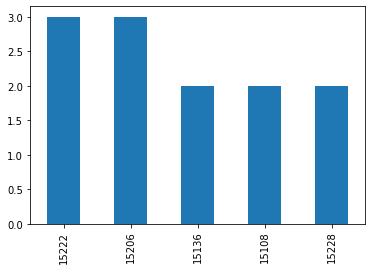

In [8]:
Farmer_zip.head().plot(kind='bar')

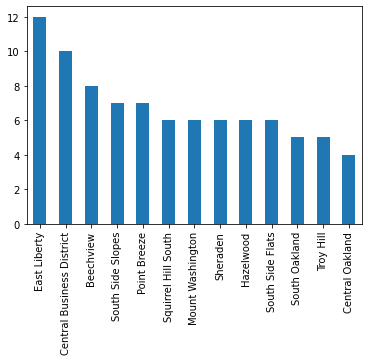

In [9]:
hood_data=Park_Data['neighborhood']
i_data=(Park_Data['neighborhood'].value_counts())
i_data.head(13).plot(kind='bar')

In [10]:
covid_cases.groupby('neighborhood_municipality')['reinfections'].sum().sort_values()

neighborhood_municipality
Undefined (Pittsburgh)               0
Trafford                             5
Rosslyn Farms                        9
Arlington Heights (Pittsburgh)      16
Glenfield                           16
                                  ... 
Scott                             6440
Ross                              6752
Monroeville                       7024
McKeesport                        7388
Penn Hills                        8826
Name: reinfections, Length: 221, dtype: int64

In [11]:
covid_cases.groupby('neighborhood_municipality')['deaths'].sum().sort_values()

neighborhood_municipality
Glen Osborne                0
Undefined (Pittsburgh)      0
Haysville                   0
Thornburg                   0
Bradford Woods              0
                         ... 
McKeesport                114
Penn Hills                124
Monroeville               136
McCandless                140
Ross                      158
Name: deaths, Length: 221, dtype: int64

We found that there are multiple healthiest neighborhoods in Pittsburgh. This is because there was not a lot of overlap between the healthiest neighborhoods defined by our sub-metrics. We found that East Liberty, Trafford, Glenfield, Troy Hill, and Larimer are the healthiest neighborhoods in Pittsburgh. 

# Conclusion